In [1]:
import keras_ocr
import os
import matplotlib.pyplot as plt
# import cv2
from spellchecker import SpellChecker

In [3]:
# image_folder = 'C:/Users/oyku_/Desktop/Recipe Collector/image pro/recipe_pic_'
image_folder = 'C:/Users/oyku_/Desktop/image-pro/im/recipe_pic_keras_test'

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()


Looking for C:\Users\oyku_\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\oyku_\.keras-ocr\crnn_kurapan.h5


In [5]:
# def resize_images(image_path, target_size =(1024,1024)):
#     image = keras_ocr.tools.read(image_path)
#     return cv2.resize(image, target_size)
images = [
    keras_ocr.tools.read(os.path.join(image_folder, img))
    for img in os.listdir(image_folder)
    if img.lower().endswith(('.png', '.jpeg', '.jpg'))
]
print(f"Loaded {len(images)} images from {image_folder}")


Loaded 7 images from C:/Users/oyku_/Desktop/image-pro/im/recipe_pic_keras_test


In [6]:
if images:
    print(f"Shape of the first image: {images[0].shape}")
else:
    print("No images were successfully loaded.")

Shape of the first image: (295, 236, 3)


In [7]:
predict_group = pipeline.recognize(images)
# batch_size = 10
# image_file = [
#     os.path.join(image_folder, img)
#     for img in os.listdir(image_folder)
#     if img.lower().endswith(('.png', '.jpeg', '.jpg'))
# ]

# prediction = []
# for i in range(0, len(image_file), batch_size):
#     batch = image_file[i:i + batch_size]
#     image_batch = [keras_ocr.tools.read(img) for img in batch]
#     prediction_batch = pipeline.recognize(image_batch)
#     prediction.extend(prediction_batch)

# print(f"Processed {len(prediction)} images in batches.")

: 

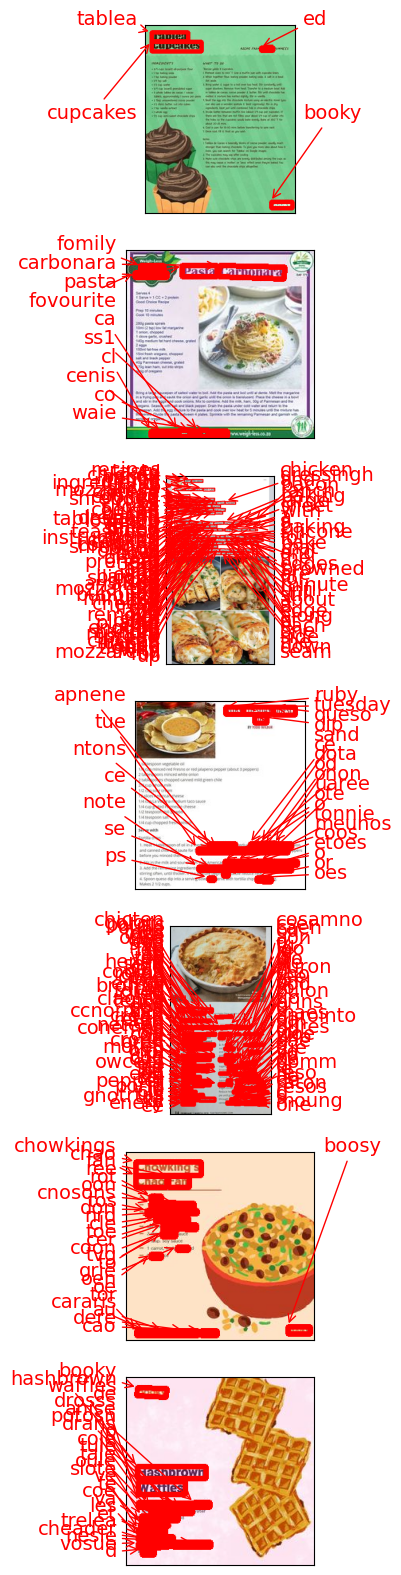

In [8]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, predict_group):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

In [2]:
predict_group


NameError: name 'predict_group' is not defined

In [10]:
predicted_image = predict_group[2]
for text, box in predicted_image:
    print(text)

recipes
tasty
4d
chicken
bacon
ranch
rolfups
ingredients
of
6
slices
mozzarella
cheese
12
cooked
shredded
grilled
chicken
1
cups
or
14
cooked
123
slicesj
bacon
cup
tablespoon
lowcarb
ranch
dressing
t
1
finely
sliced
onion
teaspoon
green
instructionsi
1
combine
shredded
chicken
cooked
ranch
dressingh
and
bacon
aside
onions
in
bowl
set
green
a
2
preheat
the
350f
and
line
large
baking
sheet
with
to
oven
a
a
silicone
baking
mat
slices
silicone
for
3
arrange
the
mozzarella
the
baking
bake
mat
on
bubbling
57
minutes
until
the
cheese
is
and
the
edges
browned
are
from
the
and
for
minute
until
still
4
remove
let
cool
about
oven
a
pliable
but
cool
enough
to
handle
5
spread
the
chicken
bacon
ranch
mixture
along
edge
of
each
one
slice
tightly
with
side
mozzarella
roll
the
down
seam
up


In [ ]:
def calculate_spelling_accuracy(text_file):

    spell = SpellChecker()

    with open(text_file, 'r', encoding='utf-8') as f:
        text_content = f.read()

    words = text_content.split()

    misspelled = spell.unknown(words)

    total_words = len(words)
    correct_words = total_words - len(misspelled)
    accuracy = correct_words / total_words if total_words > 0 else 0

    print(f"Total Words: {total_words}")
    print(f"Correct Words: {correct_words}")
    print(f"Misspelled Words: {len(misspelled)}")
    print(f"Spelling Accuracy: {accuracy:.2%}")

    return accuracy

text_file = '../new_parsed_recipes_tesseract.csv'

calculate_spelling_accuracy(text_file)